In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from dowker_homology import dowker_persistent_homology, plot_persistence
%matplotlib notebook

In [2]:
# read data
mat = loadmat("data/nk15c30Dct.mat")
coords = mat["nk15c30Dct"]
print(coords.shape)

(15000, 8)


In [3]:
# choose parameters
n = 700
interleaving = 10
dimension = 1

In [4]:
%%time 
homology_dowker, cover_radius_dowker, max_filtration_value_dowker = dowker_persistent_homology(
    coords, 
    n_samples=n, 
    interleaving=interleaving,
    dimension=dimension, 
    method="dowker",
    verbose=True)

Unreduced nerve has cardinality 57167250.0
Clique reduced nerve of cover has cardinality 1926129
Sparse nerve of cover has cardinality 523415
CPU times: user 3h 14min 49s, sys: 2.85 s, total: 3h 14min 51s
Wall time: 3h 14min 52s


<IPython.core.display.Javascript object>


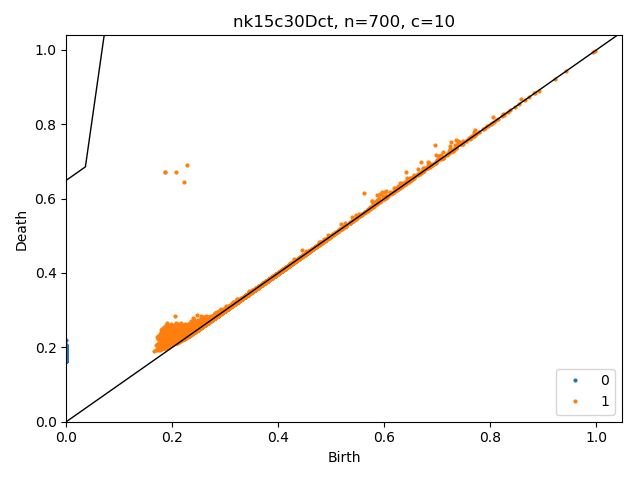

In [5]:
plot_dowker = plot_persistence(homology_dowker,
                               ticks=None, 
                               interleaving=interleaving,
                               cover_radius=cover_radius_dowker,
                               max_filtration_value=max_filtration_value_dowker,
                               title='nk15c30Dct, n=700, c=10',
                               s=10)

In [13]:
persistence_order = np.argsort(homology_dowker[:,2]-homology_dowker[:,1])

In [14]:
sorted_homology = homology_dowker[persistence_order][::-1]

In [15]:
sorted_homology[:10]

array([[ 1.        ,  0.1867271 ,  0.67127231],
       [ 1.        ,  0.18675796,  0.67026632],
       [ 1.        ,  0.20693566,  0.67257931],
       [ 1.        ,  0.22815185,  0.69168068],
       [ 1.        ,  0.22135572,  0.64536822],
       [ 0.        ,  0.        ,  0.22043558],
       [ 0.        ,  0.        ,  0.20650974],
       [ 0.        ,  0.        ,  0.20526444],
       [ 0.        ,  0.        ,  0.20520327],
       [ 0.        ,  0.        ,  0.20496794]])